# K-Nearest Neighbours
Tools used: Pandas and Numpy

In [1]:
#Import the dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


In [2]:
#Declares appropriate functions
def fetch_dataset():
    '''
    Reads, normalizes,shuffles and returns train,validate and test data
    '''
    df = pd.read_csv("iris.data",delimiter=',',header=None)
    df.ix[:,0:3] = df.ix[:,0:3] - df.ix[:,0:3].mean()/(df.ix[:,0:3].max()-df.ix[:,0:3].min())
    df = df.apply(np.random.permutation)
    num_records = df.shape[0]
    train_df=df.ix[:round(num_records*0.6)]
    validate_df = df.ix[round(num_records*0.6):round(num_records*0.8)]
    test_df=df.ix[round(num_records*0.8):]
    train_df.index=range(0,train_df.shape[0])
    validate_df.index=range(0,validate_df.shape[0])
    test_df.index=range(0,test_df.shape[0])
    return train_df,validate_df,test_df

In [3]:
class KNNClassifier:
    '''
    Class which does the K-Nearest neighbour classification
    '''
    def __init__(self,k):
        self.k = k
        

    def KNN(self,train_df,test_df):
        '''
        Does the K-Nearest neighbour classification
        '''
        train_labels = train_df[[4]]
        train_features = train_df[[0,1,2,3]]
        final_prediction = []
        for i in xrange(test_df.shape[0]):
            dist_df = train_features.apply(lambda train_vec: np.linalg.norm(train_vec-test_df.ix[i]),axis=1)
            dist_df.sort_values(inplace=True)
            possible_indices= dist_df.head(self.k).index
            possible_labels=train_labels.ix[possible_indices][4]
            final_prediction.append(possible_labels.value_counts().argmax())
        return pd.DataFrame(final_prediction)

    def calculate_accuracy(self,x,y):
        '''
        Measures the accuracy between two pandas dataframes
        '''
        return accuracy_score(x,y)

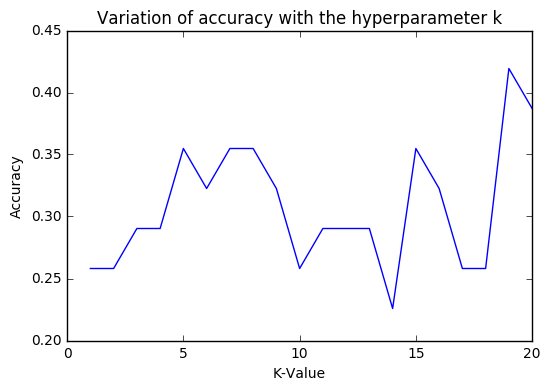

In [6]:
train,validate,test=fetch_dataset()
val_labels = validate[[4]]
val_features=validate[[0,1,2,3]]

x_k = range(1,21)
y_k = []
for k in xrange(1,21):
    c = KNNClassifier(k)
    pred_label = np.array(c.KNN(train,val_features))
    y_k.append(c.calculate_accuracy(pred_label,val_labels))
plt.plot(x_k,y_k)
plt.ylabel("Accuracy")
plt.xlabel("K-Value")
plt.title('Variation of accuracy with the hyperparameter k')
plt.show()